In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import math
from timeit import default_timer as timer
from datetime import datetime, timedelta
import numba
from ensemble_processing import load_data, load, save
import keras

/Users/neilkloot/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
pd.options.display.max_rows=500
pd.options.display.max_columns=500

In [3]:
def return_week_median(df):
    # assumes a datetime index
    return df.resample('1W').median()


# test_df = pd.DataFrame({
#     'dates': ['2018-01-02', '2018-01-03', '2018-01-04', '2018-03-05', '2019-04-09'],
#     'val': [1, 2, 2, 3, 3],
#     'date2': ['2019-01-02', '2019-01-03','2019-02-02', '2019-02-03', '2019-05-05']
# })
# test_df['dates'] = pd.to_datetime(test_df['dates'], errors='coerce')
# test_df['date2'] = pd.to_datetime(test_df['date2'], errors='coerce')
# test_df.sort_values(by=['dates'], inplace=True)
# print(test_df.dtypes)
# test_df.set_index('dates', inplace=True)
# print(test_df)
# print(test_df.index)
# print(test_df.index.week, test_df.index.year)
# return_week_median(test_df)

In [4]:
import sklearn
sklearn.__version__

'0.20.3'

In [11]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
# Load data
print('Loading data...')
all_df = pd.read_pickle('../data/ml-20190115-processed.pkl.gz', compression='gzip')


Loading data...



--------------------------------------------------------------------------------
Executing bollinger category transformation
--------------------------------------------------------------------------------
  --- Existing dtypes --- 
52WeekHigh float32
52WeekLow float32
640106_A3597525W float32
AINTCOV float32
AverageVolume float32
Beta float32
BookValuePerShareYear float32
CashPerShareYear float32
DPSRecentYear float32
EBITDMargin float32
EPS float32
EPSGrowthRate10Years float32
EPSGrowthRate5Years float32
FIRMMCRT float32
FIRMMCRT_T11_20P float32
FIRMMCRT_T1P float32
FIRMMCRT_T2_5P float32
FIRMMCRT_T6_10P float32
FXRUSD float32
FXRUSD_T11_20P float32
FXRUSD_T1P float32
FXRUSD_T2_5P float32
FXRUSD_T6_10P float32
Float float32
GICSIndustry category
GICSIndustryGroup category
GICSSector category
GRCPAIAD float32
GRCPAIAD_T11_20P float32
GRCPAIAD_T1P float32
GRCPAIAD_T2_5P float32
GRCPAIAD_T6_10P float32
GRCPAISAD float32
GRCPAISAD_T11_20P float32
GRCPAISAD_T1P float32
GRCPAISAD_T2_5P fl

fifty_two_week_std float32
fifty_two_week_total_return float32
four_week_bollinger_lower float32
four_week_bollinger_prediction category
four_week_bollinger_type category
four_week_bollinger_upper float32
four_week_comparison_adjustedPrice float32
four_week_comparison_date datetime64[ns]
four_week_dividend_return float32
four_week_dividend_value float32
four_week_max float32
four_week_mean float32
four_week_median float32
four_week_min float32
four_week_price_change float32
four_week_price_return float32
four_week_std float32
four_week_total_return float32
lastTradePriceOnly float32
marketCapitalization float32
one_week_bollinger_lower float32
one_week_bollinger_prediction category
one_week_bollinger_type category
one_week_bollinger_upper float32
one_week_comparison_adjustedPrice float32
one_week_comparison_date datetime64[ns]
one_week_dividend_return float32
one_week_dividend_value float32
one_week_max float32
one_week_mean float32
one_week_median float32
one_week_min float32
one_week

/Users/neilkloot/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/neilkloot/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/neilkloot/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan


Converting to week median values
Symbol: GSW number of median records: 111 average change: 1.5623096227645874
Getting general categorical vals
Symbol: CUA number of records: 794

Converting to week median values
Symbol: CUA number of median records: 164 average change: 0.22959904372692108
Getting general categorical vals
Symbol: FLT number of records: 3009

Converting to week median values
Symbol: FLT number of median records: 603 average change: 0.39136746525764465
Getting general categorical vals
Symbol: OVN number of records: 697

Converting to week median values
Symbol: OVN number of median records: 131 average change: -0.5754274129867554
Getting general categorical vals
Symbol: FDM number of records: 561

Converting to week median values
Symbol: FDM number of median records: 103 average change: 0.8355064988136292
Getting general categorical vals
Symbol: SVW number of records: 3009

Converting to week median values
Symbol: SVW number of median records: 603 average change: 0.284800

Symbol: TKL number of median records: 602 average change: 0.6398528814315796
Getting general categorical vals
Symbol: ZMI number of records: 2953

Converting to week median values
Symbol: ZMI number of median records: 592 average change: -0.6122817993164062
Getting general categorical vals
Symbol: DGO number of records: 2872

Converting to week median values
Symbol: DGO number of median records: 576 average change: 9.142443656921387
Getting general categorical vals
Symbol: ALT number of records: 3007

Converting to week median values
Symbol: ALT number of median records: 603 average change: 0.6140872240066528
Getting general categorical vals
Symbol: RNO number of records: 2950

Converting to week median values
Symbol: RNO number of median records: 592 average change: 32.46965408325195
Symbol plot 4
Getting general categorical vals
Symbol: IRC number of records: 3007

Converting to week median values
Symbol: IRC number of median records: 602 average change: 0.2503195106983185
Getting ge

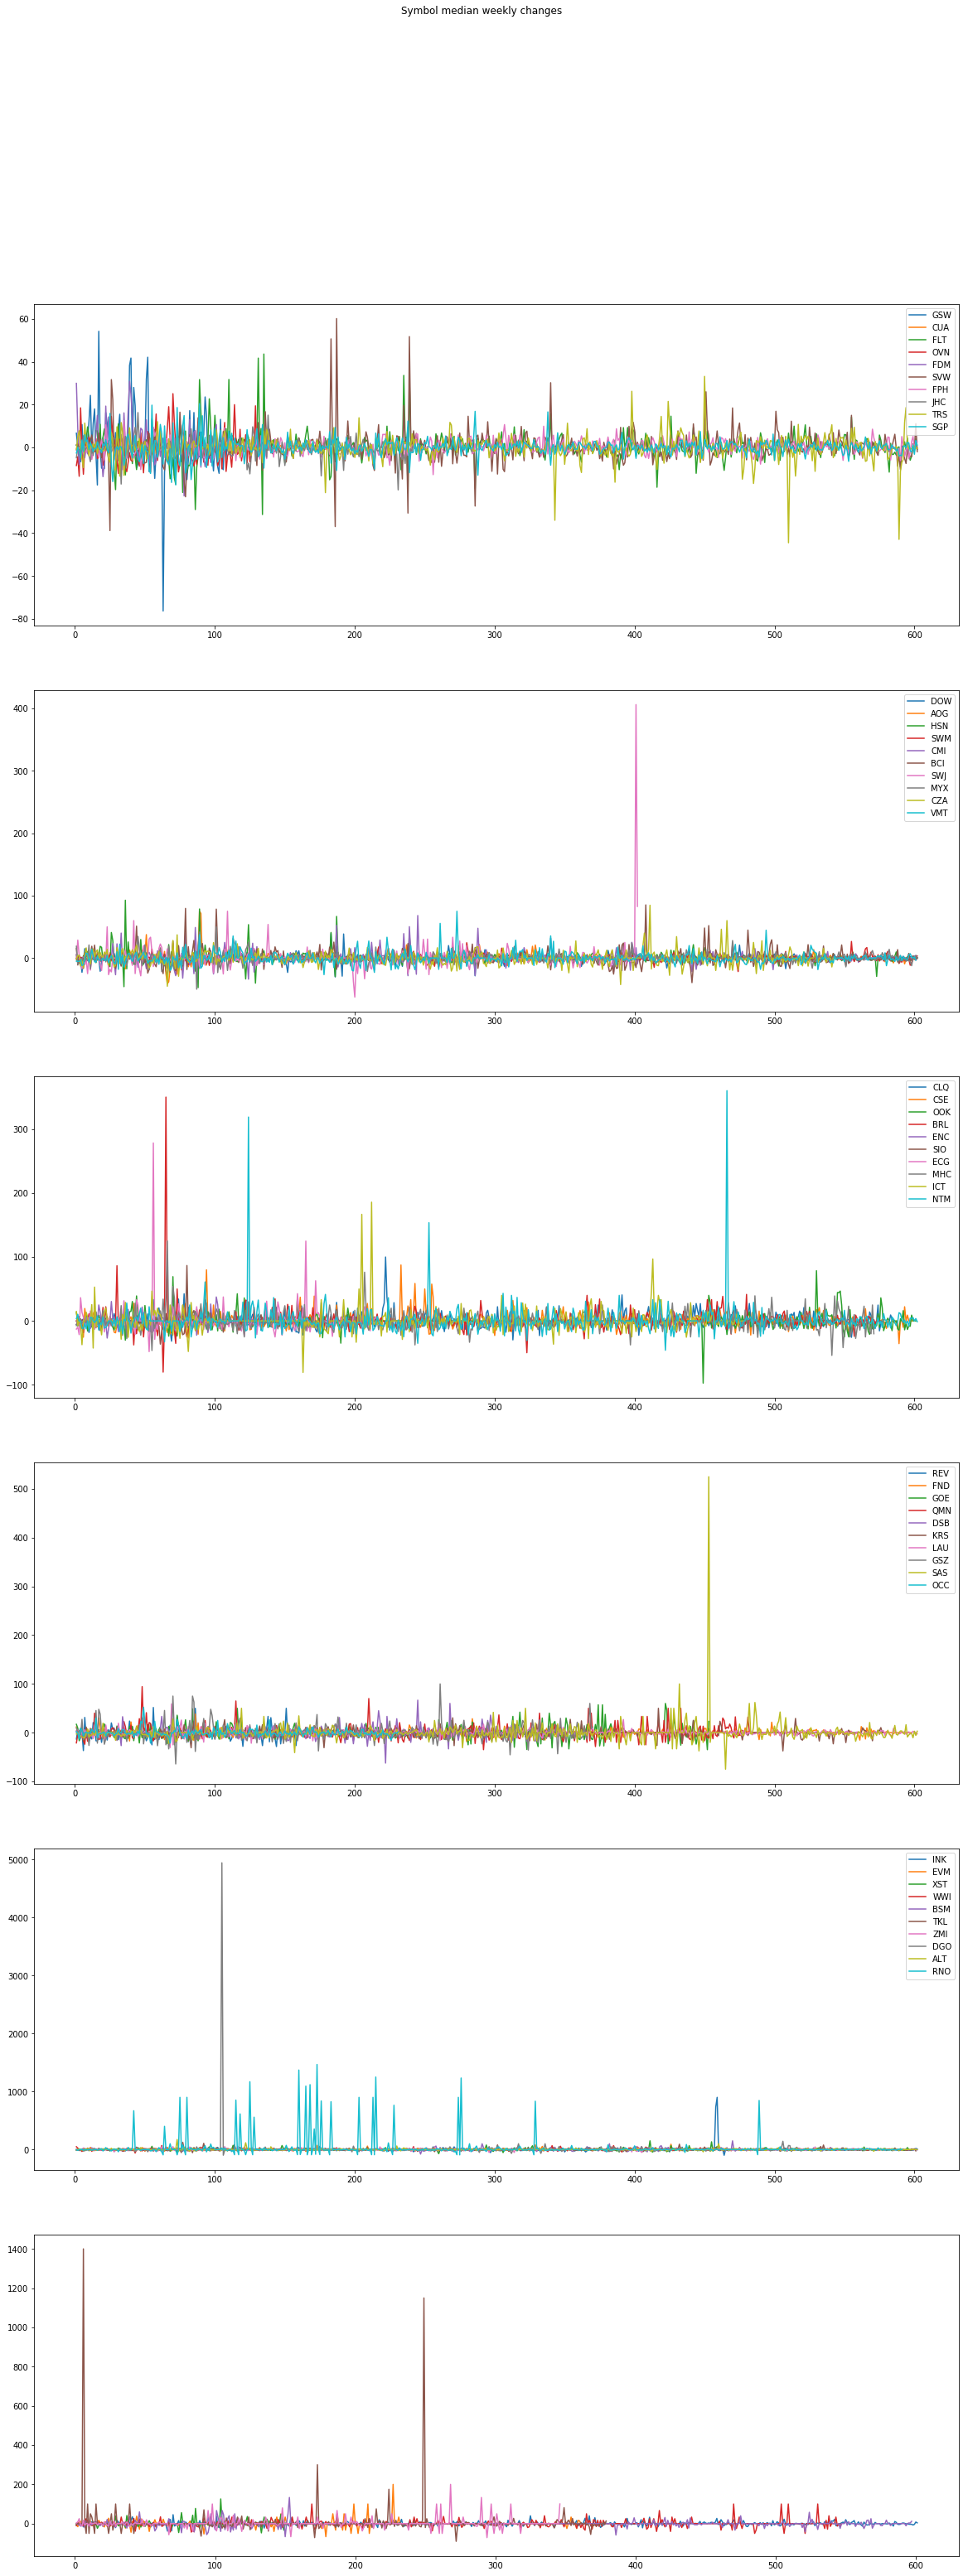

In [104]:
from processing_constants import PAST_RESULTS_CATEGORICAL_COLUMNS
from ensemble_processing import convert_file_string
import matplotlib.pyplot as plt 
import math

# plt.figure(figsize=(12, 3))

# experiment_symbols = ['WAX', 'IVV', 'WESN', 'IAA', 'XRO', 'MTB', 'MXR', 'RCP', 'ISX', 'IMI']
experiment_symbols = ['GSW','CUA','FLT','OVN','FDM','SVW','FPH','JHC','TRS','SGP','DOW','AOG',
                      'HSN','SWM','CMI','BCI','SWJ','MYX','CZA','VMT','CLQ','CSE','OOK','BRL',
                      'ENC','SIO','ECG','MHC','ICT','NTM','REV','FND','GOE','QMN','DSB','KRS',
                      'LAU','GSZ','SAS','OCC','INK','EVM','XST','WWI','BSM','TKL','ZMI','DGO',
                      'ALT','RNO','IRC','AYM','IVG','MPE','OAR','DSE','KTL']

## Previous high rquared .98 -> IVV
## Previous low rsquared 0.13 -> LMW

# Encode bollinger categorical values to integers so medians can be calculated
print('')
print('-' * 80)
print('Executing bollinger category transformation')
print('-' * 80)
print('  --- Existing dtypes --- ') 
[print(col, all_df[col].dtype) for col in all_df.columns]

proc_df = pd.concat([all_df, pd.get_dummies(all_df[PAST_RESULTS_CATEGORICAL_COLUMNS])],axis=1)
print('')
print('  --- Converted dtypes --- ')
[print(col, proc_df[col].dtype) for col in proc_df.columns]

train_x_dfs = []
plot_counter = 0
symbol_counter = 0
# plt.subplots(6, sharex=True)

f, axarr = plt.subplots(6, figsize=(20,50))

for symbol in experiment_symbols:
    # Filter to model data for this symbol and re-set the pandas indexes
    model_data = proc_df.loc[proc_df['symbol'] == symbol]
    # Get categorical vals
    print('Getting general categorical vals')
    gics_sector = model_data.iloc[0]['GICSSector']
    gics_industry_group = model_data.iloc[0]['GICSIndustryGroup']
    gics_industry = model_data.iloc[0]['GICSIndustry']
    
    print('Symbol:', symbol, 'number of records:', len(model_data))
    
    print('')
    
    print('Converting to week median values')    
    # Conert date to number
    model_data['exDividendRelative'] = model_data['exDividendDate'] - model_data['quoteDate']
    # convert string difference value to integer
    model_data['exDividendRelative'] = model_data['exDividendRelative'].apply(
        lambda x: np.nan if pd.isnull(x) else x.days)
    # Make sure it is the minimum data type size
    model_data.loc[:, 'exDividendRelative'] = model_data['exDividendRelative'].astype('int32', errors='ignore')
        
    median_model_data = return_week_median(model_data)
    
    # Re-add in key categorical values
    median_model_data['symbol'] = symbol
    median_model_data['GICSSector'] = gics_sector
    median_model_data['GICSIndustryGroup'] = gics_industry_group
    median_model_data['GICSIndustry'] = gics_industry
        
    # Calculate weekly change
    median_model_data['price_change_perc'] = (median_model_data['adjustedPrice'] - median_model_data['adjustedPrice'].shift(1)) / median_model_data['adjustedPrice'].shift(1) * 100

    print('Symbol:', symbol, 'number of median records:', len(median_model_data), 'average change:', np.mean(median_model_data['price_change_perc']))
    
    axarr[plot_counter].plot(range(len(median_model_data)), median_model_data['price_change_perc'].values, label=symbol)

    if(symbol_counter % 10 == 9):
        print('Symbol plot', plot_counter)
        axarr[plot_counter].legend(loc="upper right")
        plot_counter = plot_counter + 1
            
    train_x_dfs.append(median_model_data)
    symbol_counter += 1
    

# Create concatenated dataframe with all data
print('Creating concatenated dataframes')
df_train_x = pd.concat(train_x_dfs)

print('-'*20)
print('Overall totals')
print(' - ', len(df_train_x))

# plt.legend(loc='best')
f.suptitle('Symbol median weekly changes')
# plt.title("")
plt.show()

del proc_df

In [ ]:
del train_x_dfs
del all_df

In [35]:
# Save dataframes
df_train_x.to_pickle("../data/ml-rnn-experiment-baseline.pkl.gz", compression='gzip')

# Pre-processing

In [36]:
def remove_future_cols(df):
    cols_to_drop = []
    for col in df.columns:
        if 'future' in col or col.startswith('_'):
            cols_to_drop.append(col)

    return df.drop(cols_to_drop, axis=1)

In [106]:
from ensemble_processing import execute_one_hot_string_encoder, train_rar_encoder
from processing_constants import COLUMNS_TO_REMOVE
from sklearn.preprocessing import MinMaxScaler, Imputer
from sklearn.preprocessing import OrdinalEncoder

target_col = 'price_change_perc'

all_train_x = df_train_x.dropna(subset=[target_col])
all_train_x = remove_future_cols(all_train_x)
all_train_x.drop(COLUMNS_TO_REMOVE, axis=1, errors='ignore', inplace=True)
categorical_vals = ['symbol', 'GICSSector', 'GICSIndustryGroup', 'GICSIndustry']
symbol_lookup = all_train_x['symbol']

print('Encoding categorical vals')
cat_enc = OrdinalEncoder()
all_train_x[categorical_vals] = cat_enc.fit_transform(all_train_x[categorical_vals].values)

all_val_cols = []

for col in all_train_x.columns:
    if col != target_col:
        all_val_cols.append(col)
        
print(all_val_cols)

print('Training and executing imputer')
imputer = Imputer(strategy='median')
all_train_x[all_val_cols] = imputer.fit_transform(all_train_x[all_val_cols].values)

print('Training and executing scaler')
scaler = MinMaxScaler(feature_range=(0, 1))
all_train_x[all_val_cols] = scaler.fit_transform(all_train_x[all_val_cols].values)

print('Done')

Encoding categorical vals
['52WeekHigh', '52WeekLow', '640106_A3597525W', 'AINTCOV', 'Beta', 'BookValuePerShareYear', 'CashPerShareYear', 'DPSRecentYear', 'EPS', 'FIRMMCRT', 'FIRMMCRT_T11_20P', 'FIRMMCRT_T1P', 'FIRMMCRT_T2_5P', 'FIRMMCRT_T6_10P', 'FXRUSD', 'FXRUSD_T11_20P', 'FXRUSD_T1P', 'FXRUSD_T2_5P', 'FXRUSD_T6_10P', 'Float', 'GRCPAIAD', 'GRCPAIAD_T11_20P', 'GRCPAIAD_T1P', 'GRCPAIAD_T2_5P', 'GRCPAIAD_T6_10P', 'GRCPAISAD', 'GRCPAISAD_T11_20P', 'GRCPAISAD_T1P', 'GRCPAISAD_T2_5P', 'GRCPAISAD_T6_10P', 'GRCPBCAD', 'GRCPBCAD_T11_20P', 'GRCPBCAD_T1P', 'GRCPBCAD_T2_5P', 'GRCPBCAD_T6_10P', 'GRCPBCSAD', 'GRCPBCSAD_T11_20P', 'GRCPBCSAD_T1P', 'GRCPBCSAD_T2_5P', 'GRCPBCSAD_T6_10P', 'GRCPBMAD', 'GRCPBMAD_T11_20P', 'GRCPBMAD_T1P', 'GRCPBMAD_T2_5P', 'GRCPBMAD_T6_10P', 'GRCPNRAD', 'GRCPNRAD_T11_20P', 'GRCPNRAD_T1P', 'GRCPNRAD_T2_5P', 'GRCPNRAD_T6_10P', 'GRCPRCAD', 'GRCPRCAD_T11_20P', 'GRCPRCAD_T1P', 'GRCPRCAD_T2_5P', 'GRCPRCAD_T6_10P', 'H01_GGDPCVGDP', 'H01_GGDPCVGDPFY', 'H01_GGDPCVGDPFY_T11_20P', '

/Users/neilkloot/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training and executing scaler
Done


In [45]:
# all_train_x.isnull().sum()
# all_train_x['_13']
# all_train_x.drop(['_13'], axis=1, inplace=True)
# all_df['exDividendDate'].isnull()
symbol_lookup == 'GSW'

quoteDate_ref
2016-12-18     True
2016-12-25     True
2017-01-01     True
2017-01-08     True
2017-01-15     True
2017-01-22     True
2017-01-29     True
2017-02-05     True
2017-02-12     True
2017-02-19     True
2017-02-26     True
2017-03-05     True
2017-03-12     True
2017-03-19     True
2017-03-26     True
2017-04-02     True
2017-04-09     True
2017-04-16     True
2017-04-23     True
2017-04-30     True
2017-05-07     True
2017-05-14     True
2017-05-21     True
2017-05-28     True
2017-06-04     True
2017-06-11     True
2017-06-18     True
2017-06-25     True
2017-07-02     True
2017-07-09     True
2017-07-16     True
2017-07-23     True
2017-07-30     True
2017-08-06     True
2017-08-13     True
2017-08-20     True
2017-08-27     True
2017-09-03     True
2017-09-10     True
2017-09-17     True
2017-09-24     True
2017-10-01     True
2017-10-08     True
2017-10-15     True
2017-10-22     True
2017-10-29     True
2017-11-05     True
2017-11-12     True
2017-11-19     True
2017-1

## Convert to X and Y sequences

In [143]:
from numpy import array

rnn_list_x = list()
rnn_list_y = list()
rnn_list_symbols = list()

rnn_list_test_x = list()
rnn_list_test_y = list()
rnn_list_test_symbols = list()


for symbol in experiment_symbols:
    # Filter to model data for this symbol and re-set the pandas indexes
    model_data = all_train_x.loc[symbol_lookup == symbol]
    
    X = list()
    y = list()
    test_X = list()
    test_y = list()
    
    # input and output time steps 
    n_input = 12
    n_out = 4
    
    # nuber of features
    n_features = model_data.shape[1]
#     print(n_features)
    
    in_start = 0
    eighty_num = int(len(model_data) * .80)
    
    # step over the first 80% of the history one time step at a time - training
    for _ in range(eighty_num):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        
        # ensure we have enough data for this instance
        if out_end < len(model_data):
            X.append(model_data.iloc[in_start:in_end, :].values)
            y.append(model_data.iloc[in_end:out_end, n_features-1].values)
            
            rnn_list_x.append(model_data.iloc[in_start:in_end, :].values)
            rnn_list_y.append(model_data.iloc[in_end:out_end, n_features-1].values)
            rnn_list_symbols.append(symbol)
            
#             if (_ % 200 == 199):
#                 print('-'*80)
#                 print(symbol)
#                 print(model_data.iloc[in_start:in_end, :])
#                 print('-'*50)
#                 print(model_data.iloc[in_end:out_end, n_features-1])

        # move along one time step
        in_start += 1

    # step over the last 20% of the history one time step at a time - test
    for _ in range(eighty_num + 1, len(model_data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        
        # ensure we have enough data for this instance
        if out_end < len(model_data):
            test_X.append(model_data.iloc[in_start:in_end, :].values)
            test_y.append(model_data.iloc[in_end:out_end, n_features-1].values)
            
            rnn_list_test_x.append(model_data.iloc[in_start:in_end, :].values)
            rnn_list_test_y.append(model_data.iloc[in_end:out_end, n_features-1].values)
            rnn_list_test_symbols.append(symbol)
            
#             if (_ % 200 == 199):
#                 print('-'*80)
#                 print(symbol)
#                 print(model_data.iloc[in_start:in_end, :])
#                 print('-'*50)
#                 print(model_data.iloc[in_end:out_end, n_features-1])

        # move along one time step
        in_start += 1
        
    train_x = array(X)
    train_y = array(y)
    test_x = array(test_X)
    test_y = array(test_y)
    
    print('-' * 80)
    print('Symbol:', symbol)
    print(' - train sequence shape:', train_x.shape)
    print(' - test sequence shape:', test_x.shape)
    
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    
    # reshape output into [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))

    print('train n_timesteps', n_timesteps)
    print('train n_features', n_features)
    print('train n_outputs', n_outputs)
    print('-' * 5)

    test_n_timesteps, test_n_features, test_n_outputs = test_x.shape[1], test_x.shape[2], test_y.shape[1]
    
    # reshape output into [samples, timesteps, features]
    test_y = test_y.reshape((test_y.shape[0], test_y.shape[1], 1))

    print('test n_timesteps', test_n_timesteps)
    print('test n_features', test_n_features)
    print('test n_outputs', test_n_outputs)
    print('-' * 5)
    
    print('train x rnn len:', len(rnn_list_x))
    print('train y rnn len:', len(rnn_list_y))
    print('test x rnn len:', len(rnn_list_test_x))
    print('test y rnn len:', len(rnn_list_test_y))

    
#     print(train_x)
#     print(train_y)

# # Create concatenated dataframe with all data
# print('Creating concatenated dataframes')
# df_train_x = pd.concat(train_x_dfs)

rnn_train_x = array(rnn_list_x)
rnn_train_y = array(rnn_list_y)
rnn_symbols = array(rnn_list_symbols)

rnn_test_x = array(rnn_list_test_x)
rnn_test_y = array(rnn_list_test_y)
rnn_test_symbols = array(rnn_list_test_symbols)


n_timesteps, n_features, n_outputs = rnn_train_x.shape[1], rnn_train_x.shape[2], rnn_train_y.shape[1]

# reshape output into [samples, timesteps, features]
rnn_train_y = rnn_train_y.reshape((rnn_train_y.shape[0], rnn_train_y.shape[1], 1))

test_n_timesteps, test_n_features, test_n_outputs = rnn_test_x.shape[1], rnn_test_x.shape[2], rnn_test_y.shape[1]

# reshape output into [samples, timesteps, features]
rnn_test_y = rnn_test_y.reshape((rnn_test_y.shape[0], rnn_test_y.shape[1], 1))


print('-'*20)
print('Overall totals')

print(' - train timesteps', n_timesteps)
print(' - train features', n_features)
print(' - train outputs', n_outputs)

print(' - train X shape: ', rnn_train_x.shape)
print(' - train y shape: ', rnn_train_y.shape)
print(' - train symbols lookup shape: ', rnn_symbols.shape)

print(' - test timesteps', test_n_timesteps)
print(' - test features', test_n_features)
print(' - test outputs', test_n_outputs)

print(' - test X shape: ', rnn_test_x.shape)
print(' - test y shape: ', rnn_test_y.shape)
print(' - test symbols lookup shape: ', rnn_test_symbols.shape)

248
--------------------------------------------------------------------------------
Symbol: GSW
 - train sequence shape: (88, 12, 248)
 - test sequence shape: (6, 12, 248)
train n_timesteps 12
train n_features 248
train n_outputs 4
test n_timesteps 12
test n_features 248
test n_outputs 4
train x rnn len: 88
train y rnn len: 88
test x rnn len: 6
test y rnn len: 6
248
--------------------------------------------------------------------------------
Symbol: CUA
 - train sequence shape: (130, 12, 248)
 - test sequence shape: (17, 12, 248)
train n_timesteps 12
train n_features 248
train n_outputs 4
test n_timesteps 12
test n_features 248
test n_outputs 4
train x rnn len: 218
train y rnn len: 218
test x rnn len: 23
test y rnn len: 23
248
--------------------------------------------------------------------------------
Symbol: FLT
 - train sequence shape: (481, 12, 248)
 - test sequence shape: (105, 12, 248)
train n_timesteps 12
train n_features 248
train n_outputs 4
test n_timesteps 12
test n

--------------------------------------------------------------------------------
Symbol: OOK
 - train sequence shape: (480, 12, 248)
 - test sequence shape: (105, 12, 248)
train n_timesteps 12
train n_features 248
train n_outputs 4
test n_timesteps 12
test n_features 248
test n_outputs 4
train x rnn len: 9035
train y rnn len: 9035
test x rnn len: 1905
test y rnn len: 1905
248
--------------------------------------------------------------------------------
Symbol: BRL
 - train sequence shape: (462, 12, 248)
 - test sequence shape: (100, 12, 248)
train n_timesteps 12
train n_features 248
train n_outputs 4
test n_timesteps 12
test n_features 248
test n_outputs 4
train x rnn len: 9497
train y rnn len: 9497
test x rnn len: 2005
test y rnn len: 2005
248
--------------------------------------------------------------------------------
Symbol: ENC
 - train sequence shape: (106, 12, 248)
 - test sequence shape: (11, 12, 248)
train n_timesteps 12
train n_features 248
train n_outputs 4
test n_time

--------------------------------------------------------------------------------
Symbol: BSM
 - train sequence shape: (481, 12, 248)
 - test sequence shape: (105, 12, 248)
train n_timesteps 12
train n_features 248
train n_outputs 4
test n_timesteps 12
test n_features 248
test n_outputs 4
train x rnn len: 17068
train y rnn len: 17068
test x rnn len: 3574
test y rnn len: 3574
248
--------------------------------------------------------------------------------
Symbol: TKL
 - train sequence shape: (480, 12, 248)
 - test sequence shape: (105, 12, 248)
train n_timesteps 12
train n_features 248
train n_outputs 4
test n_timesteps 12
test n_features 248
test n_outputs 4
train x rnn len: 17548
train y rnn len: 17548
test x rnn len: 3679
test y rnn len: 3679
248
--------------------------------------------------------------------------------
Symbol: ZMI
 - train sequence shape: (472, 12, 248)
 - test sequence shape: (103, 12, 248)
train n_timesteps 12
train n_features 248
train n_outputs 4
test n

In [111]:
rnn_train_x.shape
# print(df_train_x.drop(['future_eight_week_return'], axis=1, errors='ignore').columns.values)

(26402, 12, 248)

In [112]:
rnn_train_y.shape

(26402, 4, 1)

In [137]:
rnn_train_y.reshape(len(rnn_train_y),4)

array([[ 11.1111145,  17.999994 ,  -3.3898275, -17.543858 ],
       [ 17.999994 ,  -3.3898275, -17.543858 ,  54.255325 ],
       [ -3.3898275, -17.543858 ,  54.255325 ,  -0.3448355],
       ...,
       [  0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ]],
      dtype=float32)

In [118]:
print(rnn_train_x[0, :, 247])
print(rnn_train_x[1, :, 247])
print(rnn_train_x[2, :, 247])
print(rnn_train_x[3, :, 247])

[ 6.66666031  0.         -6.24999428 -6.66666985 10.71428585 -1.61290169
  0.          4.91802788  3.12500644 12.12120914 24.32432556 -2.17391729]
[ 0.         -6.24999428 -6.66666985 10.71428585 -1.61290169  0.
  4.91802788  3.12500644 12.12120914 24.32432556 -2.17391729 11.1111145 ]
[-6.24999428 -6.66666985 10.71428585 -1.61290169  0.          4.91802788
  3.12500644 12.12120914 24.32432556 -2.17391729 11.1111145  17.99999428]
[-6.66666985 10.71428585 -1.61290169  0.          4.91802788  3.12500644
 12.12120914 24.32432556 -2.17391729 11.1111145  17.99999428 -3.38982749]


In [119]:
print(rnn_train_y[0])
print(rnn_train_y[1])
print(rnn_train_y[2])
print(rnn_train_y[3])

[[ 11.1111145]
 [ 17.999994 ]
 [ -3.3898275]
 [-17.543858 ]]
[[ 17.999994 ]
 [ -3.3898275]
 [-17.543858 ]
 [ 54.255325 ]]
[[ -3.3898275]
 [-17.543858 ]
 [ 54.255325 ]
 [ -0.3448355]]
[[-17.543858 ]
 [ 54.255325 ]
 [ -0.3448355]
 [ -9.6885805]]


In [124]:
print(np.unique(rnn_symbols))
msk = rnn_symbols=='ALT'
print(msk)

['ALT' 'AOG' 'AYM' 'BCI' 'BRL' 'BSM' 'CLQ' 'CMI' 'CSE' 'CUA' 'CZA' 'DGO'
 'DOW' 'DSB' 'DSE' 'ECG' 'ENC' 'EVM' 'FDM' 'FLT' 'FND' 'FPH' 'GOE' 'GSW'
 'GSZ' 'HSN' 'ICT' 'INK' 'IRC' 'IVG' 'JHC' 'KRS' 'KTL' 'LAU' 'MHC' 'MPE'
 'MYX' 'NTM' 'OAR' 'OCC' 'OOK' 'OVN' 'QMN' 'REV' 'RNO' 'SAS' 'SGP' 'SIO'
 'SVW' 'SWJ' 'SWM' 'TKL' 'TRS' 'VMT' 'WWI' 'XST' 'ZMI']
[False False False ... False False False]


In [74]:
def plot_prediction(x, y_true, y_pred):
    """Plots the predictions.
    
    Arguments
    ---------
    x: Input sequence of shape (input_sequence_length,
        dimension_of_signal)
    y_true: True output sequence of shape (input_sequence_length,
        dimension_of_signal)
    y_pred: Predicted output sequence (input_sequence_length,
        dimension_of_signal)
    """

    plt.figure(figsize=(12, 3))

    output_dim = x.shape[-1]
    for j in range(output_dim):
        past = x[:, j] 
        true = y_true[:, j]
        pred = y_pred[:, j]

        label1 = "Seen (past) values" if j==0 else "_nolegend_"
        label2 = "True future values" if j==0 else "_nolegend_"
        label3 = "Predictions" if j==0 else "_nolegend_"

        plt.plot(range(len(past)), past, "o--b",
                 label=label1)
        plt.plot(range(len(past),
                 len(true)+len(past)), true, "x--b", label=label2)
        plt.plot(range(len(past), len(pred)+len(past)), pred, "o--y",
                 label=label3)
    plt.legend(loc='best')
    plt.title("Predictions v.s. true values")
    plt.show()

In [126]:
## Reference data
from scipy import stats

print('Min:', np.min(rnn_train_y))
print('Max:', np.max(rnn_train_y))
print('Median:', np.median(rnn_train_y))
print('Modes:', stats.mode(rnn_train_y))
print('Averages:', np.mean(rnn_train_y))
print('25th percentiles:', np.percentile(rnn_train_y, 25))
print('80th percentiles:', np.percentile(rnn_train_y, 80))
print('90th percentile:', np.percentile(rnn_train_y, 90))


for symbol in np.unique(rnn_symbols):
    print('-'*80)
    print(symbol)
    print('-'*80)
    msk = (rnn_symbols=='ALT')
    print('Min:', np.min(rnn_train_y[msk]))
    print('Max:', np.max(rnn_train_y[msk]))
    print('Median:', np.median(rnn_train_y[msk]))
    print('Modes:', stats.mode(rnn_train_y[msk]))
    print('Averages:', np.mean(rnn_train_y[msk]))
    print('25th percentiles:', np.percentile(rnn_train_y[msk], 25))
    print('80th percentiles:', np.percentile(rnn_train_y[msk], 80))
    print('90th percentile:', np.percentile(rnn_train_y[msk], 90))

Min: -98.83333
Max: 4943.3335
Median: 0.0
Modes: ModeResult(mode=array([[[0.],
        [0.],
        [0.],
        [0.]]], dtype=float32), count=array([[[6798],
        [6804],
        [6816],
        [6829]]]))
Averages: 1.3331228
25th percentiles: -3.5714290142059326
80th percentiles: 4.001990795135498
90th percentile: 9.903995513916016
--------------------------------------------------------------------------------
ALT
--------------------------------------------------------------------------------
Min: -39.999996
Max: 173.0609
Median: 0.0
Modes: ModeResult(mode=array([[[0.],
        [0.],
        [0.],
        [0.]]], dtype=float32), count=array([[[181],
        [182],
        [183],
        [184]]]))
Averages: 0.6399121
25th percentiles: -5.882353782653809
80th percentiles: 6.724512577056885
90th percentile: 15.021687507629395
--------------------------------------------------------------------------------
AOG
-----------------------------------------------------------------------

--------------------------------------------------------------------------------
Min: -39.999996
Max: 173.0609
Median: 0.0
Modes: ModeResult(mode=array([[[0.],
        [0.],
        [0.],
        [0.]]], dtype=float32), count=array([[[181],
        [182],
        [183],
        [184]]]))
Averages: 0.6399121
25th percentiles: -5.882353782653809
80th percentiles: 6.724512577056885
90th percentile: 15.021687507629395
--------------------------------------------------------------------------------
EVM
--------------------------------------------------------------------------------
Min: -39.999996
Max: 173.0609
Median: 0.0
Modes: ModeResult(mode=array([[[0.],
        [0.],
        [0.],
        [0.]]], dtype=float32), count=array([[[181],
        [182],
        [183],
        [184]]]))
Averages: 0.6399121
25th percentiles: -5.882353782653809
80th percentiles: 6.724512577056885
90th percentile: 15.021687507629395
-------------------------------------------------------------------------------

25th percentiles: -5.882353782653809
80th percentiles: 6.724512577056885
90th percentile: 15.021687507629395
--------------------------------------------------------------------------------
SVW
--------------------------------------------------------------------------------
Min: -39.999996
Max: 173.0609
Median: 0.0
Modes: ModeResult(mode=array([[[0.],
        [0.],
        [0.],
        [0.]]], dtype=float32), count=array([[[181],
        [182],
        [183],
        [184]]]))
Averages: 0.6399121
25th percentiles: -5.882353782653809
80th percentiles: 6.724512577056885
90th percentile: 15.021687507629395
--------------------------------------------------------------------------------
SWJ
--------------------------------------------------------------------------------
Min: -39.999996
Max: 173.0609
Median: 0.0
Modes: ModeResult(mode=array([[[0.],
        [0.],
        [0.],
        [0.]]], dtype=float32), count=array([[[181],
        [182],
        [183],
        [184]]]))
Averages: 0.63

## Model evaluator

In [174]:
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score, median_absolute_error
from stats_operations import safe_mape


def eval_results(actual_y, predicted_y):
    """
    :returns: 
        mae, mape, rsquared, explain_variance, medae, num_vals
    """

    num_vals = len(actual_y)
#         print('Number of instances: %s' % num_vals)


    # Work through each val in y
    mae = mean_absolute_error(actual_y, predicted_y)
#             print('Mean absolute error: %s' % mae)
    mape = safe_mape(actual_y, predicted_y)
#             print('Mean absolute percentage error: %s' % mape)
    rsquared = r2_score(actual_y, predicted_y)
#             print('rsquared: %s' % rsquared)
    explain_variance = explained_variance_score(actual_y, predicted_y)
#             print('Explained variance: %s' % explain_variance)
    medae = median_absolute_error(actual_y, predicted_y)
#             print('Median absolute error: %s' % medae)

    return mae, mape, rsquared, explain_variance, medae, num_vals

def perform_eval(name, actuals, predictions):

    eval_dict = {
        'name': [name],
        'num_vals': [len(actuals)]
    }

    # execute eval per column
    for _ in range(actuals.shape[1]):
        col_actual_y = actuals[_]
        col_predict_y = predictions[_]
       
        mae, mape, rsquared, explain_variance, medae, num_vals = eval_results(col_actual_y, col_predict_y)

        mean_actual_val = np.mean(col_actual_y)
        median_actual_val = np.median(col_actual_y)

        mean_predicted_val = np.mean(col_predict_y)
        median_predicted_val = np.median(col_predict_y)

        eval_dict['y_' + str(_) + '_mean_actual_val'] = [mean_actual_val]
        eval_dict['y_' + str(_) + '_median_actual_val'] = [median_actual_val]
        eval_dict['y_' + str(_) + '_mean_predicted_val'] = [mean_predicted_val]
        eval_dict['y_' + str(_) + '_median_predicted_val'] = [median_predicted_val]
        eval_dict['y_' + str(_) + '_mae'] = [mae] 
        eval_dict['y_' + str(_) + '_mape'] = [mape]
        eval_dict['y_' + str(_) + '_rsquared'] = [rsquared]
        eval_dict['y_' + str(_) + '_explain_variance'] = [explain_variance]
        eval_dict['y_' + str(_) + '_medae'] = [medae] 
        
        
#     print(eval_dict)
    eval_df = pd.DataFrame.from_dict(eval_dict)
    
    return eval_df

def evaluate_results(symbols_x, predictions, actuals):
    # Determine unique list of symbols
    symbols = np.unique(symbols_x)

    print('Overall results, number of items in prediction data:', len(predictions))
    df_results = perform_eval('overall', actuals, predictions)
    
    print('Executing symbol results, number of symbols in prediction data:', len(symbols))

    for symbol in symbols:
        # Retrieve data indices which match symbols
        pred_index = np.where(symbols_x == symbol)[0]

        # Retrieve data which matches symbol
        symbol_predictions = predictions[pred_index]
        symbol_actuals = actuals[pred_index]
        
        print(symbol, 'results, number of items in prediction data:', len(symbol_predictions))

        df_symbol_results = perform_eval(symbol, symbol_actuals, symbol_predictions)

        # Add data frame into all results
        df_results = pd.concat([df_results, df_symbol_results])

    # When all symbols are done, write the results as a csv
    return df_results

## Encoder 1

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from AdamW import AdamW

rnn_train_y = rnn_train_y.reshape(len(rnn_train_y),4)
rnn_test_y = rnn_test_y.reshape(len(rnn_test_y),4)


layers = [2, 2, 1]
batch_size = 128
num_epochs = 100
num_samples = rnn_train_x.shape[0]

scaled_layers = []
for layer in layers:
    scaled_layers.append(max(int(n_features * layer), 1))

early_stopping = EarlyStopping(monitor='val_loss', patience=30)
# csv_logger = CSVLogger('./logs/nn-training-log.log')
checkpointer = ModelCheckpoint(
filepath='./weights/lstm-weights.hdf5', verbose=0, save_best_only=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-5, verbose=1)
weight_decay = 0.005 * batch_size / num_samples / num_epochs **0.5

print(scaled_layers)
print(batch_size)
print(num_epochs)
print(num_samples)
print(weight_decay)

# define model
model = Sequential()
model.add(LSTM(scaled_layers[0], 
               activation='relu', 
               input_shape=(n_timesteps, n_features),
               kernel_regularizer=L1L2(0.01, 0.01)))
model.add(RepeatVector(n_outputs))

# for layer_size in scaled_layers[1:-1]:
model.add(LSTM(scaled_layers[1], activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(scaled_layers[2], activation='relu')))
model.add(TimeDistributed(Dense(4)))

model.compile(loss='mae', optimizer=AdamW(weight_decay=weight_decay))
# fit network
model.fit(rnn_train_x, 
          rnn_train_y,
          validation_data = (rnn_test_x, rnn_test_y),
          epochs=num_epochs, 
          batch_size=batch_size, 
          callbacks=[early_stopping, checkpointer, reduce_lr],
          verbose=1)

# model.load_weights('./weights/lstm-weights.hdf5')
# print('Executing keras predictions...')
# y_test_predictions = model.predict(x_test)



Epoch 1/100
 - 54s - loss: 7.5186


/Users/neilkloot/anaconda/lib/python3.6/site-packages/keras/callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/Users/neilkloot/anaconda/lib/python3.6/site-packages/keras/callbacks.py:432: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 2/100
 - 44s - loss: 7.5101
Epoch 3/100
 - 45s - loss: 7.5097
Epoch 4/100
 - 49s - loss: 7.5085
Epoch 5/100
 - 48s - loss: 7.5072
Epoch 6/100
 - 45s - loss: 7.5069
Epoch 7/100
 - 45s - loss: 7.5068
Epoch 8/100
 - 46s - loss: 7.5078
Epoch 9/100
 - 45s - loss: 7.5065
Epoch 10/100
 - 46s - loss: 7.5063
Epoch 11/100
 - 45s - loss: 7.5062
Epoch 12/100
 - 57s - loss: 7.5059
Epoch 13/100
 - 48s - loss: 7.5065
Epoch 14/100
 - 49s - loss: 7.5063
Epoch 15/100
 - 49s - loss: 7.5069
Epoch 16/100
 - 47s - loss: 7.5064
Epoch 17/100
 - 48s - loss: 7.5064
Epoch 18/100
 - 47s - loss: 7.5060
Epoch 19/100
 - 48s - loss: 7.5070
Epoch 20/100
 - 51s - loss: 7.5062
Epoch 21/100
 - 47s - loss: 7.5062
Epoch 22/100
 - 44s - loss: 7.5061
Epoch 23/100
 - 51s - loss: 7.5055
Epoch 24/100
 - 47s - loss: 7.5053
Epoch 25/100
 - 52s - loss: 7.5051
Epoch 26/100
 - 49s - loss: 7.5049
Epoch 27/100
 - 45s - loss: 7.5049
Epoch 28/100
 - 45s - loss: 7.5044
Epoch 29/100
 - 47s - loss: 7.5045
Epoch 30/100
 - 47s - loss: 

In [127]:
model.predict(rnn_train_x[0:10])

array([[[-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06]],

       [[-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06]],

       [[-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06]],

       [[-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06]],

       [[-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06]],

       [[-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06]],

       [[-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06]],

       [[-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06]],

       [[-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06]],

       [[-9.895361e-06],
        [-9.895361e-06],
        [-9.895361e-06],
       

In [146]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint, ReduceLROnPlateau
from AdamW import AdamW

rnn_train_y = rnn_train_y.reshape(len(rnn_train_y),4)
rnn_test_y = rnn_test_y.reshape(len(rnn_test_y),4)

layers = [2, 2, 1]
batch_size = 128
num_epochs = 200
num_samples = rnn_train_x.shape[0]
n_timesteps =  rnn_train_x.shape[1]
n_features = rnn_train_x.shape[2]
n_outputs = rnn_train_y.shape[1]

scaled_layers = []
for layer in layers:
    scaled_layers.append(max(int(n_features * layer), 1))

    
early_stopping = EarlyStopping(monitor='val_loss', patience=30)
# csv_logger = CSVLogger('./logs/nn-training-log.log')
checkpointer = ModelCheckpoint(
filepath='./weights/lstm-weights.hdf5', verbose=0, save_best_only=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-5, verbose=1)
weight_decay = 0.005 * batch_size / num_samples / num_epochs **0.5

print(scaled_layers)
print(batch_size)
print(num_epochs)
print(num_samples)
print(n_timesteps)
print(n_features)
print(n_outputs)
print(weight_decay)


# define model
model2 = Sequential()
model2.add(LSTM(scaled_layers[0], activation='relu', 
                input_shape=(n_timesteps, n_features), 
                kernel_regularizer=L1L2(0.01, 0.01)))
model.add(LSTM(scaled_layers[1], activation='relu', return_sequences=True))
model2.add(Dense(scaled_layers[2], activation='relu'))
model2.add(Dense(n_outputs))
model2.compile(loss='mae', optimizer='adam') #AdamW(weight_decay=weight_decay))

# fit network
model2.fit(rnn_train_x, 
          rnn_train_y,
#           validation_split=0.2,
          validation_data = (rnn_test_x, rnn_test_y),
          epochs=num_epochs, 
          batch_size=batch_size, 
          callbacks=[early_stopping, checkpointer, reduce_lr],
          verbose=1)

model2.load_weights('./weights/lstm-weights.hdf5')


# 100 epochs: loss: 7.9516 - val_loss: 5.8052
# 200 epochs: loss: 7.8844 - val_loss: 5.7364

[496, 496, 248]
128
200
21822
12
248
4
2.073816973510175e-06
Train on 21822 samples, validate on 4580 samples
Epoch 1/200
21822/21822 [==============================] - 34s 2ms/step - loss: 23.1115 - val_loss: 6.3869
Epoch 2/200
21822/21822 [==============================] - 24s 1ms/step - loss: 8.5246 - val_loss: 6.3585
Epoch 3/200
21822/21822 [==============================] - 26s 1ms/step - loss: 8.4979 - val_loss: 6.3311
Epoch 4/200
21822/21822 [==============================] - 26s 1ms/step - loss: 8.4752 - val_loss: 6.3187
Epoch 5/200
21822/21822 [==============================] - 26s 1ms/step - loss: 8.4639 - val_loss: 6.3094
Epoch 6/200
21822/21822 [==============================] - 26s 1ms/step - loss: 8.4539 - val_loss: 6.3047
Epoch 7/200
21822/21822 [==============================] - 26s 1ms/step - loss: 8.4562 - val_loss: 6.3004
Epoch 8/200
21822/21822 [==============================] - 26s 1ms/step - loss: 8.4509 - val_loss: 6.3017
Epoch 9/200
21822/21822 [================

21822/21822 [==============================] - 28s 1ms/step - loss: 8.0129 - val_loss: 5.8622
Epoch 76/200
21822/21822 [==============================] - 28s 1ms/step - loss: 8.0131 - val_loss: 5.8527
Epoch 77/200
21822/21822 [==============================] - 28s 1ms/step - loss: 8.0133 - val_loss: 5.8654
Epoch 78/200
21822/21822 [==============================] - 28s 1ms/step - loss: 8.0137 - val_loss: 5.8629
Epoch 79/200
21822/21822 [==============================] - 28s 1ms/step - loss: 8.0140 - val_loss: 5.8616
Epoch 80/200
21822/21822 [==============================] - 28s 1ms/step - loss: 8.0140 - val_loss: 5.8562
Epoch 81/200
21822/21822 [==============================] - 28s 1ms/step - loss: 8.0140 - val_loss: 5.8584
Epoch 82/200
21822/21822 [==============================] - 30s 1ms/step - loss: 8.0144 - val_loss: 5.8630
Epoch 83/200
21822/21822 [==============================] - 32s 1ms/step - loss: 8.0148 - val_loss: 5.8636
Epoch 84/200
21822/21822 [========================

Epoch 149/200
21822/21822 [==============================] - 32s 1ms/step - loss: 7.8968 - val_loss: 5.7484
Epoch 150/200
21822/21822 [==============================] - 32s 1ms/step - loss: 7.8968 - val_loss: 5.7475
Epoch 151/200
21822/21822 [==============================] - 32s 1ms/step - loss: 7.8968 - val_loss: 5.7475
Epoch 152/200
21822/21822 [==============================] - 32s 1ms/step - loss: 7.8968 - val_loss: 5.7481

Epoch 00152: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 153/200
21822/21822 [==============================] - 32s 1ms/step - loss: 7.8889 - val_loss: 5.7405
Epoch 154/200
21822/21822 [==============================] - 32s 1ms/step - loss: 7.8884 - val_loss: 5.7392
Epoch 155/200
21822/21822 [==============================] - 32s 1ms/step - loss: 7.8884 - val_loss: 5.7398
Epoch 156/200
21822/21822 [==============================] - 32s 1ms/step - loss: 7.8884 - val_loss: 5.7401
Epoch 157/200
21822/21822 [===========================

In [176]:
print('Executing keras predictions...')
print('Data: rnn_test_x', rnn_test_x.shape)
print('Data: rnn_test_y', rnn_test_y.shape)
print('Data: rnn_test_symbols', rnn_test_symbols.shape)

y_test_predictions = model2.predict(rnn_test_x)

model_eval = evaluate_results(rnn_test_symbols, y_test_predictions, rnn_test_y)
model_eval.to_csv('./results/lstm-12-14-100-epochs.csv')
print('Done')

Executing keras predictions...
Data: rnn_test_x (4580, 12, 248)
Data: rnn_test_y (4580, 4)
Data: rnn_test_symbols (4580,)
Overall results, number of items in prediction data: 4580
Executing symbol results, number of symbols in prediction data: 57
ALT results, number of items in prediction data: 105
AOG results, number of items in prediction data: 105
AYM results, number of items in prediction data: 59
BCI results, number of items in prediction data: 105
BRL results, number of items in prediction data: 100
BSM results, number of items in prediction data: 105
CLQ results, number of items in prediction data: 101
CMI results, number of items in prediction data: 105
CSE results, number of items in prediction data: 104
CUA results, number of items in prediction data: 17
CZA results, number of items in prediction data: 93
DGO results, number of items in prediction data: 99
DOW results, number of items in prediction data: 105
DSB results, number of items in prediction data: 51
DSE results, num

## Encoder 2

In [59]:
keras.backend.clear_session()

layers = [7, 7, 7, 7] # Number of neurons in each layer of the encoder and decoder = num * features

learning_rate = 0.01
decay = 0 # Learning rate decay
optimiser = keras.optimizers.Adam(lr=learning_rate, decay=decay) # Other possible optimiser "sgd" (Stochastic Gradient Descent)

# num_input_features = rnn_train_x.shape[2]
# num_output_features = 1 # The dimensionality of the output at each time step. In this case a 1D signal.

loss = "mape"

# Regularisation isn't really needed for this application
lambda_regulariser = 0.000001 # Will not be used if regulariser is None
regulariser = None # Possible regulariser: keras.regularizers.l2(lambda_regulariser)

batch_size = 512
# steps_per_epoch = 200 # batch_size * steps_per_epoch = total number of training examples
epochs = 100

input_sequence_length = 12 # Length of the sequence used by the encoder
target_sequence_length = 4 # Length of the sequence predicted by the decoder
num_steps_to_predict = 1 # Length to use when testing the model

In [65]:
# Define an input sequence.
encoder_inputs = keras.layers.Input(shape=(None, n_timesteps, n_features))

scaled_layers = []
for layer in layers:
    scaled_layers.append(max(int(n_features * layer), 1))


# Create a list of RNN Cells, these are then concatenated into a single layer
# with the RNN layer.
encoder_cells = []
for hidden_neurons in scaled_layers:
    encoder_cells.append(keras.layers.GRUCell(hidden_neurons,
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))

encoder = keras.layers.RNN(encoder_cells, return_state=True)

encoder_outputs_and_states = encoder(encoder_inputs)

# Discard encoder outputs and only keep the states.
# The outputs are of no interest to us, the encoder's
# job is to create a state describing the input sequence.
encoder_states = encoder_outputs_and_states[1:]

ValueError: Input 0 is incompatible with layer rnn_4: expected ndim=3, found ndim=4

In [61]:
# The decoder input will be set to zero (see random_sine function of the utils module).
# Do not worry about the input size being 1, I will explain that in the next cell.
decoder_inputs = keras.layers.Input(shape=(None, 1))

decoder_cells = []
for hidden_neurons in layers:
    decoder_cells.append(keras.layers.GRUCell(hidden_neurons * num_input_features,
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))

decoder = keras.layers.RNN(decoder_cells, return_sequences=True, return_state=True)

# Set the initial state of the decoder to be the ouput state of the encoder.
# This is the fundamental part of the encoder-decoder.
decoder_outputs_and_states = decoder(decoder_inputs, initial_state=encoder_states)

# Only select the output of the decoder (not the states)
decoder_outputs = decoder_outputs_and_states[0]

# Apply a dense layer with linear activation to set output to correct dimension
# and scale (tanh is default activation for GRU in Keras, our output sine function can be larger then 1)
decoder_dense = keras.layers.Dense(n_outputs,
                                   activation='linear',
                                   kernel_regularizer=regulariser,
                                   bias_regularizer=regulariser)

decoder_outputs = decoder_dense(decoder_outputs)

In [62]:
# Create a model using the functional API provided by Keras.
# The functional API is great, it gives an amazing amount of freedom in architecture of your NN.
# A read worth your time: https://keras.io/getting-started/functional-api-guide/ 
model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
model.compile(optimizer=optimiser, loss=loss)

In [63]:
model.fit(rnn_train_x,
          rnn_train_y, 
#           steps_per_epoch=steps_per_epoch,
          epochs=epochs,
          verbose=2)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[[ 3.34737539e-04,  6.82870328e-03,  7.13286881e-01, ...,
          7.50000000e-01,  8.75000000e-01,  6.66666031e+00],
        [ 3.55790226e-04,  6.82870328e-03,  7.13286881e-01, ...,
        ...

In [ ]:
# test_data_generator = random_sine(batch_size=1000,
#                                   steps_per_epoch=steps_per_epoch,
#                                   input_sequence_length=input_sequence_length,
#                                   target_sequence_length=target_sequence_length,
#                                   min_frequency=0.1, max_frequency=10,
#                                   min_amplitude=0.1, max_amplitude=1,
#                                   min_offset=-0.5, max_offset=0.5,
#                                   num_signals=num_signals, seed=2000)

# (x_encoder_test, x_decoder_test), y_test = next(test_data_generator) # x_decoder_test is composed of zeros.

# y_test_predicted = model.predict([x_encoder_test, x_decoder_test])

## Attention Model

In [ ]:
import numpy as np
import tensorflow as tf
import os

from tensorflow import keras

K = keras.backend

from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import RepeatVector, Concatenate, Activation
from tensorflow.python.keras.layers import Reshape, Input, Dense, Dot, LSTM
from tensorflow.python.keras import regularizers

from tensorflow.python.keras.models import load_model as keras_load_model

import matplotlib.pyplot as plt
import pylab


# Sometimes helpful to implement own softmax activation function to
# better manage calculations along specific axes.
def softmax_activation(x):
    e = K.exp(x - K.max(x, axis=1, keepdims=True))
    s = K.sum(e, axis=1, keepdims=True)
    return e / s


class AttentionModel(object):

    def __init__(self, x, y,
                 layer_1_rnn_units,
                 attn_dense_nodes=0,
                 epochs=100,
                 batch_size=128,
                 shared_attention_layer=True,
                 chg_yield=False,
                 float_type='float32',
                 regularization=(0.00001, '00001'),
                 window=52,
                 predict=1):
        K.clear_session()
        tf.reset_default_graph()
        self.set_learning(True)

        # Scientific computing uses 'float64' but
        # machine learning works much faster with 'float32'.
        self.float_type = float_type
        K.set_floatx(self.float_type)

        # Capture inputs to instance variables.
        self.x = x
        self.y = y
        self.epochs = epochs
        self.batch_size = batch_size
        self.shared_attention_layer = shared_attention_layer

        self.layer_1_rnn_units = layer_1_rnn_units
        self.layer_2_rnn_units = self.layer_1_rnn_units
        self.attn_dense_nodes = attn_dense_nodes

        self.num_obs = self.x.shape[0]
        self.input_len = self.x.shape[1]
        self.input_dims = self.x.shape[2]
        self.num_outputs = self.y.shape[1]

        self.regularization = regularization[0]

        assert self.x.shape[0] == self.y.shape[0]

        # Set the directory structure.
        self.model_dir = f'models//window_{window}_predict_{predict}//'

        self.model_name = f'{"yield_changes" if chg_yield==True else "yield_levels"}//' \
                          f'model_{layer_1_rnn_units}_rnn_{attn_dense_nodes}_dense_attn_' \
                          f'{epochs}_epochs_' \
                          f'{batch_size}_batch_' \
                          f'{"shared_attention" if shared_attention_layer else""}_' \
                          f'{"change_yield" if chg_yield else "level_yield"}_' \
                          f'{regularization[1]}_reg'

        # Activation function for the attention mechanism dense layer(s).
        self.attn_dense_activation = 'selu'
        self.attn_dense_initializer = 'lecun_normal'
        
    def delete_model(self):
        try:
            os.remove(f'{self.model_dir}{self.model_name}.h5')
        except Exception as e:
            print(e)

    def load_model(self):
        try:
            self.model = keras_load_model(f'{self.model_dir}{self.model_name}.h5',
                                          custom_objects={'softmax_activation': softmax_activation})
        except Exception as e:
            print(e)
            return False
        return True

    def save_model(self):
        try:
            self.model.save(f'{self.model_dir}{self.model_name}.h5')
        except Exception as e:
            print(e)
            return False
        return True

    def set_learning(self, learning):
        if learning:
            self.is_learning_phase = 1
            K.set_learning_phase(self.is_learning_phase)
            tf.keras.backend.set_learning_phase(True)
        else:
            self.is_learning_phase = 0
            K.set_learning_phase(self.is_learning_phase)
            tf.keras.backend.set_learning_phase(False)

    # Method that constructs shared layers. A shared layer means its learned parameters
    # are the same no matter where the layer is used in the neural network.
    #
    def make_shared_layers(self):
        if self.regularization > 0.:
            self.kernel_reg = regularizers.l2(self.regularization)
            self.bias_reg = regularizers.l2(self.regularization)
            self.recurrent_reg = regularizers.l2(self.regularization)
            self.recurrent_dropout = 0.1
        else:
            self.kernel_reg = self.bias_reg = self.recurrent_reg = None
            self.recurrent_dropout = 0.0

        if self.shared_attention_layer:

            # This is an optional intermediate dense layer in the attention network.
            # If it is not present, the attention mechanism goes straight from inputs to weights.
            if self.attn_dense_nodes > 0:
                self.attn_middle_dense_layer = Dense(self.attn_dense_nodes,
                                                     kernel_regularizer=self.kernel_reg,
                                                     bias_regularizer=self.bias_reg,
                                                     activation=self.attn_dense_activation,
                                                     kernel_initializer=self.attn_dense_initializer,
                                                     name='attention_mid_dense_shared')

            # This is the layer in the attention mechanism that gives the attention weights.
            self.attention_final_dense_layer = Dense(1,
                                                     kernel_regularizer=self.kernel_reg,
                                                     bias_regularizer=self.bias_reg,
                                                     activation=self.attn_dense_activation,
                                                     kernel_initializer=self.attn_dense_initializer,
                                                     name='attention_final_dense_shared')

        # Output-level LSTM cell.
        self.layer_2_LSTM_cell = LSTM(self.layer_2_rnn_units,
                                      kernel_regularizer=self.kernel_reg,
                                      recurrent_regularizer=self.recurrent_reg,
                                      bias_regularizer=self.bias_reg,
                                      recurrent_dropout=self.recurrent_dropout,
                                      return_state=True,
                                      name='layer_2_LSTM')

        # Final output (i.e., the prediction).
        self.dense_output = Dense(1,
                                  kernel_regularizer=self.kernel_reg,
                                  bias_regularizer=self.bias_reg,
                                  activation='linear',
                                  name='dense_output')

    # Builds the neural network. An LSTM+attention model doesn't need this much code.
    # This method is long because it sets lots of layer parameters and because
    # it handles four contingencies: (1) whether the attention mechanism is
    # always the same or is different for every prediction node, and (2) whether or
    # not the attention mechanism has an intermediate dense layer.
    #
    def build_attention_rnn(self):
        self.make_shared_layers()

        inputs = Input(shape=(self.input_len, self.input_dims), dtype=self.float_type)

        X = LSTM(self.layer_1_rnn_units,
                 kernel_regularizer=self.kernel_reg,
                 recurrent_regularizer=self.recurrent_reg,
                 bias_regularizer=self.bias_reg,
                 recurrent_dropout=self.recurrent_dropout,
                 return_sequences=True)(inputs)

        X = Reshape((self.input_len, self.layer_2_rnn_units))(X)

        h_start = Input(shape=(self.layer_2_rnn_units,), name='h_start')
        c_start = Input(shape=(self.layer_2_rnn_units,), name='c_start')
        h_prev = h_start
        c_prev = c_start

        outputs = list()

        # This section constructs the attention mechanism and the output-level LSTM
        # layer that leads to the predictions.
        #
        # There is an extra LSTM cell that is not attached to any prediction but
        # which begins the output-level RNN sequence. This avoids sending in a bunch
        # of zero values to the first usage of the attention mechanism.
        #
        # One way to avoid this extra LSTM cell might be to set the LSTM intial state
        # tensors "h_start" and "c_start" as trainable (instead of zeros).
        #
        for t in range(self.num_outputs + 1):
            h_prev_repeat = RepeatVector(self.input_len)(h_prev)
            joined = Concatenate(axis=-1)([X, h_prev_repeat])

            if self.attn_dense_nodes > 0:
                if self.shared_attention_layer:
                    joined = self.attn_middle_dense_layer(joined)
                else:
                    joined = Dense(self.attn_dense_nodes,
                                   kernel_regularizer=self.kernel_reg,
                                   bias_regularizer=self.bias_reg,
                                   activation=self.attn_dense_activation,
                                   kernel_initializer=self.attn_dense_initializer,
                                   name=f'attention_mid_dense_{t}')(joined)

            if self.shared_attention_layer:
                e_vals = self.attention_final_dense_layer(joined)
            else:
                e_vals = Dense(1,
                               kernel_regularizer=self.kernel_reg,
                               bias_regularizer=self.bias_reg,
                               activation=self.attn_dense_activation,
                               kernel_initializer=self.attn_dense_initializer,
                               name=f'attention_final_dense_{t}')(joined)

            alphas = Activation(softmax_activation, name=f'attention_softmax_{t}')(e_vals)
            attentions = Dot(axes=1)([alphas, X])

            h_prev, _, c_prev = self.layer_2_LSTM_cell(attentions, initial_state=[h_prev, c_prev])

            if t > 0:
                out = self.dense_output(h_prev)
                outputs.append(out)

        self.model = Model(inputs=[inputs, h_start, c_start], outputs=outputs)
        self.model.compile(loss='mse', optimizer='adam', metrics=['mse'])

        print(self.model.summary())

    def fit_model(self):
        self.set_learning(True)

        h_start = np.zeros((self.num_obs, self.layer_2_rnn_units))
        c_start = np.zeros((self.num_obs, self.layer_2_rnn_units))

        y_split = np.split(self.y, indices_or_sections=self.num_outputs, axis=1)

        self.model.fit([self.x, h_start, c_start],
                       y_split,
                       epochs=self.epochs,
                       batch_size=self.batch_size,
                       shuffle=True,
                       verbose=2,
                       validation_split=0.1)

    def calculate_attentions(self, x_data):
        self.set_learning(False)

        softmax_layer_names = [f'attention_softmax_{t}' for t in range(self.num_outputs + 1)]
        softmax_layers = list()

        for i, layer_name in enumerate(softmax_layer_names):
            if i == 0:
                continue
            intermediate_layer = Model(inputs=self.model.input,
                                       outputs=self.model.get_layer(layer_name).output)
            softmax_layers.append(intermediate_layer)

        num_obs = x_data.shape[0]
        attention_map = np.zeros((num_obs, self.num_outputs, self.input_len))

        h_start = np.zeros((1, self.layer_2_rnn_units))
        c_start = np.zeros((1, self.layer_2_rnn_units))

        for t in range(num_obs):
            print(t)
            for l_num, layer in enumerate(softmax_layers):
                softmax_results = layer.predict([np.expand_dims(x_data[t], axis=0),
                                                 h_start,
                                                 c_start])
                softmax_results = softmax_results[0, :, 0]
                attention_map[t, l_num, :] = softmax_results

        return attention_map

    def heatmap(self, data, title_supplement=None):
        plt.rcParams['axes.labelweight'] = 'bold'
        plt.rcParams['axes.labelsize'] = 22
        plt.rcParams['axes.titlesize'] = 22
        plt.rcParams['axes.titleweight'] = 'bold'
        plt.rcParams['xtick.labelsize'] = 18
        plt.rcParams['ytick.labelsize'] = 18
        plt.rcParams['axes.titlepad'] = 12
        plt.rcParams['axes.edgecolor'] = '#000000'  # '#FD5E0F'

        # Other common color schemes: 'viridis'  'plasma'  'gnuplot'
        color_map = 'inferno'
        pylab.pcolor(data, cmap=color_map, vmin=0.)
        pylab.colorbar()

        num_predictions = data.shape[0]
        num_timesteps = data.shape[1]

        if num_predictions == 4:
            pylab.yticks([0.5, 1.5, 2.5, 3.5], ['t+1', 't+2', 't+3', 't+4'])
            pylab.ylabel('y: t+1 to t+4')

            plt.axhline(y=1., xmin=0.0, xmax=51.0, linewidth=1, color='w')
            plt.axhline(y=2., xmin=0.0, xmax=51.0, linewidth=1, color='w')
            plt.axhline(y=3., xmin=0.0, xmax=51.0, linewidth=1, color='w')

        elif num_predictions == 1:
            pylab.yticks([0.5], ['t+1'])
            pylab.ylabel('y: t+1')

        assert num_timesteps == 52

        pylab.xticks([1.5, 11.5, 21.5, 31.5, 41.5, 51.5],
                     ['t-50', 't-40', 't-30', 't-20', 't-10', 't'])
        pylab.xlabel('x: t-51 to t')

        pylab.title(f'{self.model_name} {title_supplement}')

        mng = plt.get_current_fig_manager()
        mng.window.showMaximized()
        pylab.show()